In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sonuçlarda çıkan warning'leri ignore etmek için;
from warnings import filterwarnings
filterwarnings("ignore")
##################################

#dataframe'deki değerlerin 3 basamaklı float formunda gösterilmesi için;
from IPython.display import display
pd.options.display.float_format = '{:.3f}'.format
##################################

# dataframe'de kaç satır ve sütun gösterilsin;
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
###################################

In [2]:
df = pd.read_excel("train_sba.xlsx")
df1 = df.copy()

In [3]:
df.columns

Index(['AsOfDate', 'Program', 'BorrName', 'BorrStreet', 'BorrCity',
       'BorrState', 'BorrZip', 'BankName', 'BankStreet', 'BankCity',
       'BankState', 'BankZip', 'GrossApproval', 'SBAGuaranteedApproval',
       'ApprovalDate', 'ApprovalFiscalYear', 'FirstDisbursementDate',
       'DeliveryMethod', 'subpgmdesc', 'InitialInterestRate', 'TermInMonths',
       'NaicsCode', 'NaicsDescription', 'FranchiseCode', 'FranchiseName',
       'ProjectCounty', 'ProjectState', 'SBADistrictOffice',
       'CongressionalDistrict', 'BusinessType', 'LoanStatus', 'PaidInFullDate',
       'ChargeOffDate', 'GrossChargeOffAmount', 'RevolverStatus',
       'JobsSupported'],
      dtype='object')

In [4]:
# Kullanılmayacak değişkenleri sil.
df.drop(['AsOfDate', 'Program', 'BorrName', 'BorrStreet', 'BorrCity', 'BorrZip',
         'BankName', 'BankStreet', 'BankCity', 'BankZip', 'ApprovalFiscalYear',
         'NaicsDescription', 'FranchiseName','ProjectCounty', 'ProjectState',
         'SBADistrictOffice','CongressionalDistrict', 'PaidInFullDate',
         'ChargeOffDate', 'GrossChargeOffAmount'], axis=1, inplace=True)

In [5]:
df.describe(include="O").T

,count,unique,top,freq
BorrState,80501,55,CA,8992
BankState,80501,54,OH,18151
DeliveryMethod,80501,15,SBA EXPRES,47749
subpgmdesc,80501,17,FA$TRK (Small Loan Express),48125
FranchiseCode,3545,860,78760,288
BusinessType,80499,3,CORPORATION,66529
LoanStatus,80501,2,PIF,64950


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GrossApproval,80501.000,202733.431,416646.801,1000.000,25000.000,50000.000,200000.000,5000000.000
SBAGuaranteedApproval,80501.000,151711.502,341831.741,500.000,12500.000,31000.000,125460.000,4500000.000
InitialInterestRate,56326.000,6.508,1.353,0.660,5.500,6.000,7.500,11.520
TermInMonths,80501.000,83.600,57.751,0.000,59.000,84.000,84.000,330.000
NaicsCode,80495.000,507393.578,171396.732,111110.000,423910.000,523920.000,621310.000,926150.000
RevolverStatus,80501.000,0.381,0.486,0.000,0.000,0.000,1.000,1.000
JobsSupported,80501.000,11.348,37.005,0.000,2.000,5.000,11.000,4504.000


In [7]:
df

,BorrState,BankState,GrossApproval,SBAGuaranteedApproval,ApprovalDate,FirstDisbursementDate,DeliveryMethod,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,FranchiseCode,BusinessType,LoanStatus,RevolverStatus,JobsSupported
0,GA,CA,15000,12750,2008-01-02,2008-01-31,COMM EXPRS,Community Express,NaN,70,722211.000,NaN,CORPORATION,CHGOFF,0,0
1,FL,CA,15000,12750,2008-01-02,2008-01-31,COMM EXPRS,Community Express,NaN,26,236117.000,NaN,INDIVIDUAL,CHGOFF,0,7
2,MI,CA,20000,17000,2008-01-02,2008-01-03,COMM EXPRS,Community Express,NaN,48,541611.000,NaN,CORPORATION,CHGOFF,0,6
3,GA,CA,20000,17000,2008-01-02,2008-01-31,COMM EXPRS,Community Express,NaN,27,541512.000,NaN,CORPORATION,CHGOFF,0,3
4,KS,MO,30800,15400,2008-01-02,2008-01-31,SBA EXPRES,FA$TRK (Small Loan Express),NaN,60,561410.000,NaN,CORPORATION,PIF,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80496,AZ,MN,190000,95000,2014-10-28,2014-10-28,SBA EXPRES,FA$TRK (Small Loan Express),6.000,13,327991.000,NaN,CORPORATION,PIF,1,64
80497,CA,OH,40000,20000,2014-10-29,2014-11-01,SBA EXPRES,FA$TRK (Small Loan Express),9.750,60,811310.000,NaN,CORPORATION,PIF,0,1
80498,CA,OH,40000,20000,2014-11-04,2014-11-04,SBA EXPRES,FA$TRK (Small Loan Express),7.740,48,485310.000,NaN,INDIVIDUAL,PIF,0,1
80499,MA,MA,50000,25000,2014-11-07,2014-11-07,SBA EXPRES,FA$TRK (Small Loan Express),4.750,60,541199.000,NaN,CORPORATION,PIF,0,0


# Initial feature engineering;

In [8]:
# 1.Is BorrState and BankState same?
df["IsBankBorrSt_same"] = 0
df["IsBankBorrSt_same"][df.BorrState!=df.BankState] = 1

df[["IsBankBorrSt_same","BorrState","BankState"]]

,IsBankBorrSt_same,BorrState,BankState
0,1,GA,CA
1,1,FL,CA
2,1,MI,CA
3,1,GA,CA
4,1,KS,MO
...,...,...,...
80496,1,AZ,MN
80497,1,CA,OH
80498,1,CA,OH
80499,0,MA,MA


In [9]:
# 2.SBAGuaranteedApproval / GrossApproval (%)

df["SbaGuaranteedPerc"] = 100*df.SBAGuaranteedApproval/df.GrossApproval

df["SbaGuaranteedPerc"]

0       85.000
1       85.000
2       85.000
3       85.000
4       50.000
         ...  
80496   50.000
80497   50.000
80498   50.000
80499   50.000
80500   50.000
Name: SbaGuaranteedPerc, Length: 80501, dtype: float64

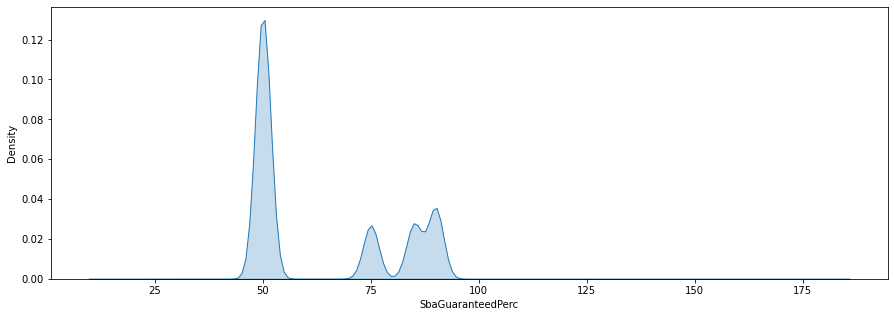

In [10]:
plt.subplots(figsize=(15,5))
sns.kdeplot(df["SbaGuaranteedPerc"], fill=True);

In [11]:
# 2.1.SbaGuaranteedPerc'de dağılım sanki discrete bir veriye aitmiş gibi gözüküyor. Bu nedenle bir discretization yapmaya karar verdik.
df["SbaGrntaPerc_bin"] = 0
df["SbaGrntaPerc_bin"][df.SbaGuaranteedPerc<=62.5] = "0-62.5"
df["SbaGrntaPerc_bin"][(df.SbaGuaranteedPerc>62.5) & (df.SbaGuaranteedPerc<=80)] = "62.5-80"
df["SbaGrntaPerc_bin"][df.SbaGuaranteedPerc>80] = "80+"

In [12]:
# 3. PIF=0 and CHGOFF=1
df["LoanStatusC"] = df.LoanStatus.replace(["PIF","CHGOFF"],[0,1])

df[["LoanStatusC","LoanStatus"]]

,LoanStatusC,LoanStatus
0,1,CHGOFF
1,1,CHGOFF
2,1,CHGOFF
3,1,CHGOFF
4,0,PIF
...,...,...
80496,0,PIF
80497,0,PIF
80498,0,PIF
80499,0,PIF


In [13]:
# 4.Is Franchise? If FranciseCode isn't Nan, company has franchise.
# No=0, Yes=1
df["IsFranchise"] = np.where(df.FranchiseCode.isna(),0,1)
df[["IsFranchise","FranchiseCode"]]

,IsFranchise,FranchiseCode
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
...,...,...
80496,0,NaN
80497,0,NaN
80498,0,NaN
80499,0,NaN


In [14]:
# 5.NaicsCode. Take first 2 number.
# Source: https://www.naics.com/search/
df["NaicsCode2"] = df.NaicsCode.apply(str)
df["NaicsCode2"] = df.NaicsCode2.apply(lambda x: x[:2])


# 31-33, 44-45 and 48-49 are actually representing the same industry branch
df.NaicsCode2.replace(["31","32","33"],"31-33", inplace=True)
df.NaicsCode2.replace(["44","45"],"44-45", inplace=True)
df.NaicsCode2.replace(["48","49"],"48-49", inplace=True)

df[["NaicsCode","NaicsCode2"]]

,NaicsCode,NaicsCode2
0,722211.000,72
1,236117.000,23
2,541611.000,54
3,541512.000,54
4,561410.000,56
...,...,...
80496,327991.000,31-33
80497,811310.000,81
80498,485310.000,48-49
80499,541199.000,54


In [15]:
# 6.Difference between Approval Date and First Disbursement in day
from dateutil.parser import parse
from datetime import date

df.ApprovalDate1 = df.ApprovalDate.astype(str)
df.FirstDisbursementDate1 = df.FirstDisbursementDate.astype(str)

df.ApprovalDate1 = df.ApprovalDate1.apply(lambda x: parse(x))
df.FirstDisbursementDate1 = df.FirstDisbursementDate1.apply(lambda x: parse(x))

df["days_to_pay"] = df.FirstDisbursementDate1 - df.ApprovalDate1
df.days_to_pay = df.days_to_pay.apply(lambda x: x.days)
df[["ApprovalDate","FirstDisbursementDate","days_to_pay"]]

,ApprovalDate,FirstDisbursementDate,days_to_pay
0,2008-01-02,2008-01-31,29
1,2008-01-02,2008-01-31,29
2,2008-01-02,2008-01-03,1
3,2008-01-02,2008-01-31,29
4,2008-01-02,2008-01-31,29
...,...,...,...
80496,2014-10-28,2014-10-28,0
80497,2014-10-29,2014-11-01,3
80498,2014-11-04,2014-11-04,0
80499,2014-11-07,2014-11-07,0


In [16]:
# 7.bin TermInMonths with 36 months;
df["Term_bin"] = 0
df["Term_bin"][df.TermInMonths<=36] = "0-36"
df["Term_bin"][(df.TermInMonths>36) & (df.TermInMonths<=72)] = "36-72"
df["Term_bin"][(df.TermInMonths>72) & (df.TermInMonths<=108)] = "72-108"
df["Term_bin"][(df.TermInMonths>108) & (df.TermInMonths<=144)] = "108-144"
df["Term_bin"][df.TermInMonths>144] = "144+"


df[["Term_bin","TermInMonths"]]

,Term_bin,TermInMonths
0,36-72,70
1,0-36,26
2,36-72,48
3,0-36,27
4,36-72,60
...,...,...
80496,0-36,13
80497,36-72,60
80498,36-72,48
80499,36-72,60


In [17]:
# 8.bin InitialInterestRate with 2;

df["interest_bin"] = 0
df["interest_bin"][df.InitialInterestRate.isna()] = "Unknown"
df["interest_bin"][df.InitialInterestRate<=2]= "0-2"
df["interest_bin"][(df.InitialInterestRate>2) & (df.InitialInterestRate<=4)]= "2-4"
df["interest_bin"][(df.InitialInterestRate>4) & (df.InitialInterestRate<=6)]= "4-6"
df["interest_bin"][(df.InitialInterestRate>6) & (df.InitialInterestRate<=8)]= "6-8"
df["interest_bin"][df.InitialInterestRate>8]= "8+"

df[["interest_bin","InitialInterestRate"]]

,interest_bin,InitialInterestRate
0,Unknown,NaN
1,Unknown,NaN
2,Unknown,NaN
3,Unknown,NaN
4,Unknown,NaN
...,...,...
80496,4-6,6.000
80497,8+,9.750
80498,6-8,7.740
80499,4-6,4.750


In [18]:
# Take months from ApprovalDate

df["approval_month"] = df.ApprovalDate.apply(lambda x: x.month)

df[["approval_month","ApprovalDate"]]

,approval_month,ApprovalDate
0,1,2008-01-02
1,1,2008-01-02
2,1,2008-01-02
3,1,2008-01-02
4,1,2008-01-02
...,...,...
80496,10,2014-10-28
80497,10,2014-10-29
80498,11,2014-11-04
80499,11,2014-11-07


In [19]:
# Artık işimize yaramayan değişkenleri atalım.

df.drop(['BankState', 'SBAGuaranteedApproval','ApprovalDate', 'FirstDisbursementDate', 'InitialInterestRate',
         'TermInMonths', 'NaicsCode', 'FranchiseCode', 'LoanStatus', 'SbaGuaranteedPerc'], axis=1, inplace=True)

In [20]:
df

,BorrState,GrossApproval,DeliveryMethod,subpgmdesc,BusinessType,RevolverStatus,JobsSupported,IsBankBorrSt_same,SbaGrntaPerc_bin,LoanStatusC,IsFranchise,NaicsCode2,days_to_pay,Term_bin,interest_bin,approval_month
0,GA,15000,COMM EXPRS,Community Express,CORPORATION,0,0,1,80+,1,0,72,29,36-72,Unknown,1
1,FL,15000,COMM EXPRS,Community Express,INDIVIDUAL,0,7,1,80+,1,0,23,29,0-36,Unknown,1
2,MI,20000,COMM EXPRS,Community Express,CORPORATION,0,6,1,80+,1,0,54,1,36-72,Unknown,1
3,GA,20000,COMM EXPRS,Community Express,CORPORATION,0,3,1,80+,1,0,54,29,0-36,Unknown,1
4,KS,30800,SBA EXPRES,FA$TRK (Small Loan Express),CORPORATION,0,3,1,0-62.5,0,0,56,29,36-72,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80496,AZ,190000,SBA EXPRES,FA$TRK (Small Loan Express),CORPORATION,1,64,1,0-62.5,0,0,31-33,0,0-36,4-6,10
80497,CA,40000,SBA EXPRES,FA$TRK (Small Loan Express),CORPORATION,0,1,1,0-62.5,0,0,81,3,36-72,8+,10
80498,CA,40000,SBA EXPRES,FA$TRK (Small Loan Express),INDIVIDUAL,0,1,1,0-62.5,0,0,48-49,0,36-72,6-8,11
80499,MA,50000,SBA EXPRES,FA$TRK (Small Loan Express),CORPORATION,0,0,0,0-62.5,0,0,54,0,36-72,4-6,11


# Feature Engineering
## Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Veriseti X=bağımsız değişkenler ve Y=output olarak ayrılır.
X = df.drop(["LoanStatusC"],axis=1)
y = df.LoanStatusC


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, stratify=y, random_state=2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=True, stratify=y_train,
                                                  random_state=2)

In [24]:
for i in [X_train, X_val, X_test, y_train, y_val, y_test]:
    i.reset_index(inplace=True, drop=True)

In [25]:
print("X_train: ",X_train.shape," ","y_train: ",y_train.shape)
print("X_val: ",X_val.shape," ","y_val: ",y_val.shape)
print("X_test: ",X_test.shape," ","y_test: ",y_test.shape)

X_train:  (48300, 15)   y_train:  (48300,)
X_val:  (16100, 15)   y_val:  (16100,)
X_test:  (16101, 15)   y_test:  (16101,)


## Missing Values

In [26]:
X_train.isnull().sum()

BorrState            0
GrossApproval        0
DeliveryMethod       0
subpgmdesc           0
BusinessType         1
RevolverStatus       0
JobsSupported        0
IsBankBorrSt_same    0
SbaGrntaPerc_bin     0
IsFranchise          0
NaicsCode2           0
days_to_pay          0
Term_bin             0
interest_bin         0
approval_month       0
dtype: int64

In [27]:
X_val.isnull().sum()

BorrState            0
GrossApproval        0
DeliveryMethod       0
subpgmdesc           0
BusinessType         1
RevolverStatus       0
JobsSupported        0
IsBankBorrSt_same    0
SbaGrntaPerc_bin     0
IsFranchise          0
NaicsCode2           0
days_to_pay          0
Term_bin             0
interest_bin         0
approval_month       0
dtype: int64

In [28]:
X_test.isnull().sum()

BorrState            0
GrossApproval        0
DeliveryMethod       0
subpgmdesc           0
BusinessType         0
RevolverStatus       0
JobsSupported        0
IsBankBorrSt_same    0
SbaGrntaPerc_bin     0
IsFranchise          0
NaicsCode2           0
days_to_pay          0
Term_bin             0
interest_bin         0
approval_month       0
dtype: int64

In [29]:
# BusinessType'ı mode ile doldurmayı deneyelim.
X_train.groupby(["IsFranchise","BusinessType"])["BusinessType"].count()

IsFranchise  BusinessType
0            CORPORATION     37899
             INDIVIDUAL       7256
             PARTNERSHIP       949
1            CORPORATION      2038
             INDIVIDUAL        120
             PARTNERSHIP        37
Name: BusinessType, dtype: int64

In [30]:
X_train.BusinessType.fillna('CORPORATION', inplace=True)
X_val.BusinessType.fillna('CORPORATION', inplace=True)

In [31]:
# NaicsCode'da da "na" isimli değerler var, bunları değiştirip valid bir değer atamak lazım.
X_train.groupby(["IsFranchise","NaicsCode2"])["NaicsCode2"].count()

IsFranchise  NaicsCode2
0            11             850
             21             192
             22              46
             23            5270
             31-33         4184
             42            3223
             44-45         6699
             48-49         2381
             51             763
             52             694
             53             979
             54            5502
             55              13
             56            2268
             61             561
             62            4094
             71             859
             72            4009
             81            3502
             92              13
             na               3
1            11               1
             23              45
             31-33           60
             42              23
             44-45          337
             48-49           22
             51              14
             52              22
             53              27
             54 

In [32]:
X_train.NaicsCode2.fillna('44-45', inplace=True)
X_val.NaicsCode2.fillna('44-45', inplace=True)

In [33]:
# tüm Nan'ler dolduruldu.
for i in [X_train, X_val, X_test]:
    print(i.isna().any().any())

False
False
False


In [34]:
X_train.isna().any().any()

False

## Handling Categorical

In [35]:
X_train.head(5)

,BorrState,GrossApproval,DeliveryMethod,subpgmdesc,BusinessType,RevolverStatus,JobsSupported,IsBankBorrSt_same,SbaGrntaPerc_bin,IsFranchise,NaicsCode2,days_to_pay,Term_bin,interest_bin,approval_month
0,MN,54900,SBA EXPRES,FA$TRK (Small Loan Express),CORPORATION,0,1,1,0-62.5,0,48-49,0,36-72,6-8,11
1,DE,25000,COMM EXPRS,Community Express,CORPORATION,0,10,1,80+,0,81,18,72-108,6-8,12
2,UT,25000,SBA EXPRES,FA$TRK (Small Loan Express),CORPORATION,1,3,1,0-62.5,0,31-33,22,36-72,Unknown,5
3,NY,600000,SBA EXPRES,FA$TRK (Small Loan Express),CORPORATION,0,10,1,0-62.5,0,23,351,72-108,4-6,12
4,NY,50000,SBA EXPRES,FA$TRK (Small Loan Express),CORPORATION,1,0,1,0-62.5,0,53,0,72-108,6-8,12


In [36]:
for i in X_train.columns:
    print(i, X_train[i].unique().size)

BorrState 55
GrossApproval 4276
DeliveryMethod 15
subpgmdesc 17
BusinessType 3
RevolverStatus 2
JobsSupported 238
IsBankBorrSt_same 2
SbaGrntaPerc_bin 3
IsFranchise 2
NaicsCode2 21
days_to_pay 813
Term_bin 5
interest_bin 6
approval_month 12


In [37]:
# One Hot Encodings; "BusinessType","Term_bin","interest_bin","approval_month" (unique sınıf sayısı az olduğu için bu değişkenlere uygulandı)
# Öncelikle approval_month değişkenini string yapmam lazım çünkü One Hot encoding işlemi sırasında fonksiyon nümerik değerleri
# encode edemiyor.

for i in [X_train, X_val, X_test]:
    i["approval_month"] = i["approval_month"].apply(str)

X_train = pd.concat([X_train,pd.get_dummies(X_train[["BusinessType","Term_bin","interest_bin","approval_month"]],
                                            drop_first=True)],axis=1)
X_val = pd.concat([X_val,pd.get_dummies(X_val[["BusinessType","Term_bin","interest_bin","approval_month"]],
                                        drop_first=True)],axis=1)
X_test = pd.concat([X_test,pd.get_dummies(X_test[["BusinessType","Term_bin","interest_bin","approval_month"]],
                                          drop_first=True)],axis=1)

In [38]:
# Mean Encoding; "BorrState","DeliveryMethod","subpgmdesc","NaicsCode2" (unique sınıf sayılar çok olduğu için bu değişkenlere uygulandı)

# İstenen her bir değişkene göre LoanStatusC'deki ortalamayı buldum, groupby'ı kullanarak
# Daha sonra sonuçları dictionary olarak kaydedip map fonksiyonu ile değişkenler üzerinde değiştirdim.
# Bunları aynı anda yapabilmek için 4 satırlık bir for loop yazdım.
for i in [X_train, X_val, X_test]:
    for j in ["BorrState","DeliveryMethod","subpgmdesc","NaicsCode2"]:
        mean_enc = pd.concat([X_train,y_train], axis=1).groupby(j)["LoanStatusC"].mean().to_dict()
        i[j+"_mean_enc"] = i[j].map(mean_enc)

In [39]:
# Target Guided Ordinal Encoding; "BusinessType","Term_bin","interest_bin","approval_month" (unique sınıf sayısı az olduğu için bu değişkenlere uygulandı)

# Önce pivot tablodan yararlanarak istenen değişkenlerin LoanStatusC'ye denk gelen ortalamalarını buldum.
# Değişkendeki sınıfları pivot tabloda index'e kaydettiği için index'i listeye çevirdim ancak bunu yaparaken sınıfları
# LoanStatusC'ye denk gelen ortalama değerlerini ascending olarak sıraladıktan sonra yaptım.
# Daha sonra sıraya göre ordinal numaraları ataması için liste oluşturdum. Bunun için liste içinde bir for döngüsü kullandım.
# for döngüsündek sınırı söz konusu değişkendeki unique sınıf sayısının bir fazlası olarak verdim çünkü range ifadesi belirtilen
# son sayının 1 eksiğine kadar döngüyü çalıştırır.
# Tabi ki tüm bunları aynı anda yapabilmek için 5 satırlık bir for loop yazdım.
for i in [X_train, X_val, X_test]:
    for j in ["BusinessType","Term_bin","interest_bin","approval_month"]:
        i[j+"_tgo_enc"] = i[j].replace(pd.pivot_table(pd.concat([X_train,y_train], axis=1),
               index=j,aggfunc="mean",values=["LoanStatusC"]).sort_values(by="LoanStatusC").index.to_list(),
                                       [x for x in range(1,X_train[j].unique().size+1)])

## Data Transform

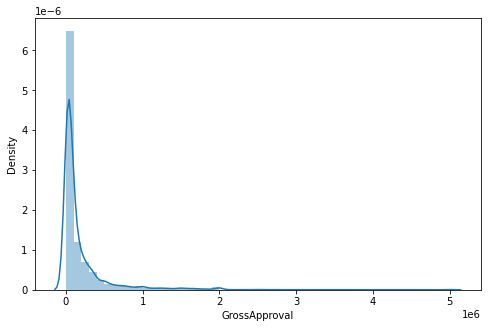

In [40]:
# GrossApproval çok sayıda Outlier içermekte ve Çarpık bir dağılıma sahip.
from scipy.stats import norm
plt.subplots(figsize=(8,5))
sns.distplot(X_train.GrossApproval);

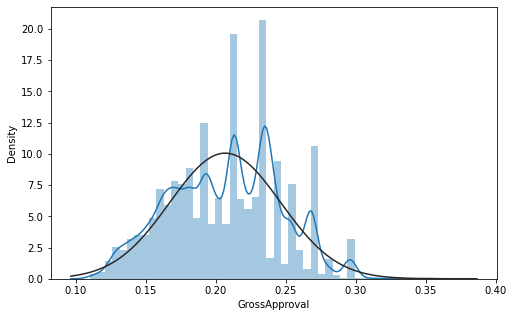

In [41]:
# GrossApproval için 7.dereceden kök alındığında Normal Dağılıma yaklaştığı görüldü ve outlier'ların etkisi azaltıldı.
plt.subplots(figsize=(8,5))
sns.distplot(X_train.GrossApproval.apply(lambda x: x**(-1/7)), fit=norm );

In [42]:
# 3 set için de dönüşüm yapılır.
for i in [X_train, X_val, X_test]:
    i["GrossApproval_trfm"] = i["GrossApproval"].apply(lambda x: x**(-1/7))

## Artık işe yaramayan değişkenleri veriden drop et;

In [43]:
# Feature Engineerin'de kullanılan ama artık işe yaramayan değişkenleri veriden at;
for i in [X_train, X_val, X_test]:
    i.drop(["DeliveryMethod","GrossApproval","BorrState","subpgmdesc","BusinessType",
            "SbaGrntaPerc_bin","NaicsCode2","Term_bin","interest_bin","approval_month",
           ], axis=1, inplace=True)

## Outliers

In [44]:
from sklearn.ensemble import IsolationForest

In [45]:
iso = IsolationForest(random_state=42,)
outliers = iso.fit_predict(X_train)
outliers

array([1, 1, 1, ..., 1, 1, 1])

In [46]:
outliers = pd.DataFrame(outliers, columns=["IsOutlier"])
X_train = pd.concat([X_train, pd.DataFrame(outliers, columns=["IsOutlier"])], axis=1)
X_train

,RevolverStatus,JobsSupported,IsBankBorrSt_same,IsFranchise,days_to_pay,BusinessType_INDIVIDUAL,BusinessType_PARTNERSHIP,Term_bin_108-144,Term_bin_144+,Term_bin_36-72,Term_bin_72-108,interest_bin_2-4,interest_bin_4-6,interest_bin_6-8,interest_bin_8+,interest_bin_Unknown,approval_month_10,approval_month_11,approval_month_12,approval_month_2,approval_month_3,approval_month_4,approval_month_5,approval_month_6,approval_month_7,approval_month_8,approval_month_9,BorrState_mean_enc,DeliveryMethod_mean_enc,subpgmdesc_mean_enc,NaicsCode2_mean_enc,BusinessType_tgo_enc,Term_bin_tgo_enc,interest_bin_tgo_enc,approval_month_tgo_enc,GrossApproval_trfm,IsOutlier
0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.123,0.172,0.173,0.172,2,5,5,3,0.210,1
1,0,10,1,0,18,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.286,0.636,0.636,0.238,2,3,5,1,0.235,1
2,1,3,1,0,22,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.246,0.172,0.173,0.152,2,5,6,7,0.235,1
3,0,10,1,0,351,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.202,0.172,0.173,0.200,2,3,2,1,0.149,1
4,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.202,0.172,0.173,0.192,2,3,5,1,0.213,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48295,1,2,1,0,17,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.202,0.172,0.173,0.101,2,3,4,8,0.213,1
48296,1,3,1,0,6,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.273,0.172,0.173,0.172,2,3,6,5,0.213,1
48297,0,8,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.120,0.172,0.173,0.213,2,5,5,4,0.253,1
48298,0,14,1,0,32,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.313,0.172,0.173,0.198,2,5,6,9,0.229,1


In [47]:
outliers = iso.predict(X_val)
outliers = pd.DataFrame(outliers, columns=["IsOutlier"])
X_val = pd.concat([X_val, pd.DataFrame(outliers, columns=["IsOutlier"])], axis=1)

In [48]:
outliers = iso.predict(X_test)
outliers = pd.DataFrame(outliers, columns=["IsOutlier"])
X_test = pd.concat([X_test, pd.DataFrame(outliers, columns=["IsOutlier"])], axis=1)

In [49]:
for i in [X_train, X_test, X_val]:
    i["IsOutlier"].replace([-1,1],[1,0], inplace=True)

## SMOTE

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
oversample = SMOTE(sampling_strategy=0.5)
X_train_sm, y_train_sm = oversample.fit_resample(X_train, y_train)

In [52]:
print("SMOTE öncesi:\n",y_train.value_counts())

SMOTE öncesi:
 0    38969
1     9331
Name: LoanStatusC, dtype: int64


In [53]:
print("SMOTE sonrası:\n",y_train_sm.value_counts())

SMOTE sonrası:
 0    38969
1    19484
Name: LoanStatusC, dtype: int64


# ML

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [55]:
def basari_metrikleri(X_train_sm, y_train_sm, X_test, y_test, model, model_adi):
    
    pred_train = model.predict(X_train_sm)
    pred_test = model.predict(X_test)
    
    print(model_adi," Train Seti için:")
    print("Precision = {}".format(precision_score(y_train_sm, pred_train,average="macro")))
    print("Recall = {}".format(recall_score(y_train_sm, pred_train,average="macro")))
    print("Accuracy = {}".format(accuracy_score(y_train_sm, pred_train)))
    print("F1 Score = {}\n".format(f1_score(y_train_sm, pred_train,average="macro")))
    
    print(model_adi," Test Seti için:")
    print("Precision = {}".format(precision_score(y_test, pred_test,average="macro")))
    print("Recall = {}".format(recall_score(y_test, pred_test,average="macro")))
    print("Accuracy = {}".format(accuracy_score(y_test, pred_test)))
    print("F1 Score = {}\n".format(f1_score(y_test, pred_test,average="macro")))
    
    plot_confusion_matrix(model, X_test, y_test)

In [56]:
X_train_sm.shape

(58453, 37)

In [57]:
rf_params = {"max_depth":[10,15,20], "min_samples_leaf":[2,3,4], "bootstrap":[True],
              "n_estimators":[100,200,300], "criterion": ["gini","entropy"], "max_features":[5,10,20]}
rf_cv = RandomizedSearchCV(RandomForestClassifier(), rf_params, 
                           cv=5, n_jobs = -1, verbose=2).fit(X_val, y_val)
rf_tuned = RandomForestClassifier(max_depth= rf_cv.best_params_["max_depth"],
                                  min_samples_leaf= rf_cv.best_params_["min_samples_leaf"], 
                                  n_estimators= rf_cv.best_params_["n_estimators"], 
                                  max_features= rf_cv.best_params_["max_features"],
                                  bootstrap= rf_cv.best_params_["bootstrap"],
                                  criterion= rf_cv.best_params_["criterion"],
                                  random_state=42, oob_score=True).fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [58]:
rf_cv.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 2,
 'max_features': 10,
 'max_depth': 15,
 'criterion': 'entropy',
 'bootstrap': True}

In [59]:
rf_cv.cv_results_['mean_test_score']

array([0.88503106, 0.88658385, 0.88708075, 0.88453416, 0.8868323 ,
       0.88      , 0.88664596, 0.88571429, 0.87931677, 0.8868323 ])

In [60]:
rf_cv.cv_results_['std_test_score']

array([0.00315733, 0.00353219, 0.00336552, 0.00275961, 0.0036249 ,
       0.00347826, 0.00268593, 0.003161  , 0.00332516, 0.00195035])

Random Forest  Train Seti için:
Precision = 0.92232881852684
Recall = 0.9036521886947085
Accuracy = 0.9234427659829264
F1 Score = 0.9120000955434009

Random Forest  Test Seti için:
Precision = 0.8255961370764306
Recall = 0.7979306103829983
Accuracy = 0.8868393267498913
F1 Score = 0.8105582591293468



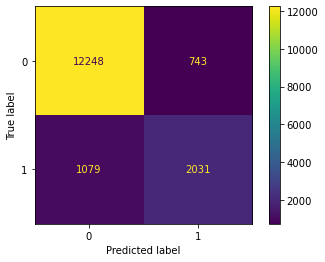

In [61]:
basari_metrikleri(X_train_sm, y_train_sm, X_test, y_test, rf_tuned, "Random Forest")

Text(0.5, 0, 'Random Forest Feature Importance')

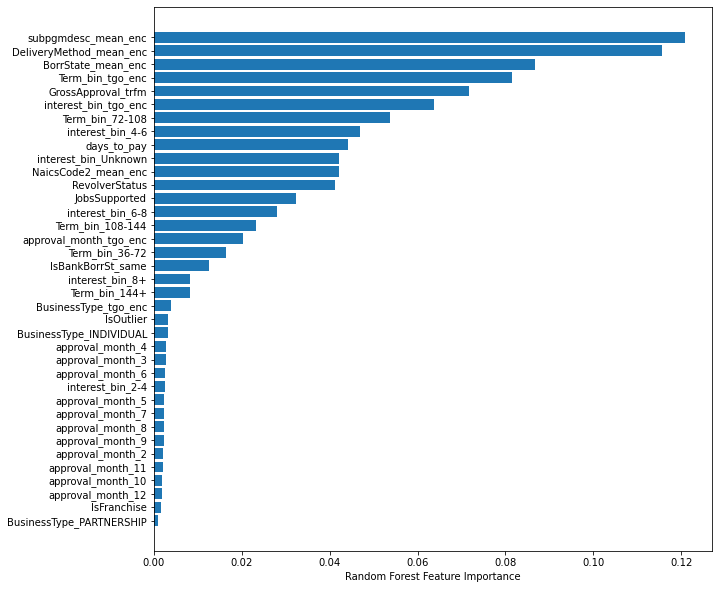

In [62]:
plt.subplots(figsize=(10,10))
sorted_idx = rf_tuned.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rf_tuned.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
logistic_params = {"penalty":['l1', 'l2','elasticnet'], "C" : [0.001, 0.01, 0.1, 1, 2, 5]}
logistic_cv = GridSearchCV(LogisticRegression(), logistic_params, cv=10, n_jobs = -1, verbose=2).fit(X_train_sm, y_train_sm)
logistic_tuned = LogisticRegression(penalty= logistic_cv.best_params_["penalty"],
                                C= logistic_cv.best_params_["C"],
                                random_state=42).fit(X_train_sm, y_train_sm)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


In [82]:
logistic_cv.best_params_

{'C': 1, 'penalty': 'l2'}

Logistic Regression  Train Seti için:
Precision = 0.8049883040700276
Recall = 0.7854021847791157
Accuracy = 0.8220450618445588
F1 Score = 0.7935110616213814

Logistic Regression  Test Seti için:
Precision = 0.7278022786908649
Recall = 0.7323876089333179
Accuracy = 0.830010558350413
F1 Score = 0.7300412897103545



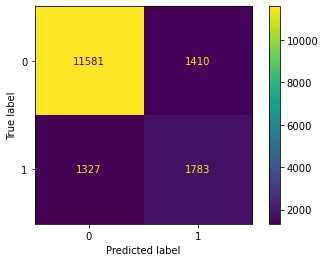

In [81]:
basari_metrikleri(X_train_sm, y_train_sm, X_test, y_test, logistic_tuned, "Logistic Regression")